In [1]:
import tensorflow as tf

print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))


2025-06-21 02:17:58.354292: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-21 02:17:58.364774: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-21 02:17:58.378315: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-21 02:17:58.382392: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-21 02:17:58.392192: I tensorflow/core/platform/cpu_feature_guar

Num GPUs Available: 1


I0000 00:00:1750452479.867633  327282 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1750452479.897838  327282 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1750452479.898037  327282 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


In [2]:
import os
import numpy as np
import cv2

base_path = r'/media/sparsh/CaptainSlow/Programming Stuff/Programming Stuff/Code _n_ Stuff/All Projects/All Projects/X-Ray Classifier/xray_iamge_dataset'

train_folder = os.path.join(base_path, 'train')
test_folder = os.path.join(base_path, 'test')

In [3]:
def gamma_correction(image, gamma = 0.8):
    invGamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** invGamma * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(image, table)

In [4]:
images = []
labels = []

IMG_SIZE = 150

for label in os.listdir(train_folder):
    label_path = os.path.join(train_folder, label)

    for image_name in os.listdir(label_path):
        img_path = os.path.join(label_path, image_name)

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Error loading: {img_path}")
            continue

        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        img = clahe.apply(img)
        img = gamma_correction(img, gamma =1.2)
        img = cv2.GaussianBlur(img, (5, 5), 0)

        img = img / 255.0

        images.append(img)
        labels.append(label)

images = np.array(images, dtype=np.float32)
labels = np.array(labels)

print(f"Dataset loaded: {images.shape[0]} images of size {IMG_SIZE}x{IMG_SIZE}")

Dataset loaded: 5216 images of size 150x150


In [5]:
train_images = images[:int(len(images) * 0.8)]
train_labels = labels[:int(len(labels) * 0.8)]

test_images = images[int(len(images) * 0.8):]
test_labels = labels[int(len(labels) * 0.8):]

In [6]:
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((4172, 150, 150), (1044, 150, 150), (4172,), (1044,))

In [7]:
train_images[0]

array([[0.5764706 , 0.57254905, 0.58431375, ..., 0.7882353 , 0.6901961 ,
        0.627451  ],
       [0.5882353 , 0.58431375, 0.58431375, ..., 0.73333335, 0.627451  ,
        0.57254905],
       [0.6313726 , 0.61960787, 0.59607846, ..., 0.6117647 , 0.5137255 ,
        0.4745098 ],
       ...,
       [0.01568628, 0.01568628, 0.01568628, ..., 0.02352941, 0.02352941,
        0.02352941],
       [0.01568628, 0.01568628, 0.01568628, ..., 0.02352941, 0.02352941,
        0.02352941],
       [0.01568628, 0.01568628, 0.01568628, ..., 0.02352941, 0.02352941,
        0.02352941]], dtype=float32)

In [8]:
train_labels[0]

'NORMAL'

In [15]:
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras



label_encoder = LabelEncoder()
label_encoder.fit(list(train_labels) + list(test_labels))

# Transform labels into integer values
train_labels_int = label_encoder.transform(train_labels).astype("int")
test_labels_int = label_encoder.transform(test_labels).astype("int")

# Convert integer labels into one-hot encoding
num_classes = len(label_encoder.classes_)
train_labels_one_hot = keras.utils.to_categorical(train_labels_int, num_classes=num_classes)
test_labels_one_hot = keras.utils.to_categorical(test_labels_int, num_classes=num_classes)

print("Labels successfully encoded and one-hot transformed!")


Labels successfully encoded and one-hot transformed!


In [23]:
#IDEK it doesnt just works anymore idk why

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization

ModuleNotFoundError: No module named 'tensorflow.keras'

In [34]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(2, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 148, 148, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 148, 148, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 15, 15, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 662,402 (2.53 MB)

 Trainable params: 661,506 (2.52 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.9028 - loss: 0.2441 - val_accuracy: 1.0000 - val_loss: 0.0152
Epoch 2/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.9709 - loss: 0.0885 - val_accuracy: 1.0000 - val_loss: 0.0255
Epoch 3/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9783 - loss: 0.0684 - val_accuracy: 1.0000 - val_loss: 4.8681e-04
Epoch 4/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9784 - loss: 0.0568 - val_accuracy: 0.9866 - val_loss: 0.0348
Epoch 5/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9805 - loss: 0.0564 - val_accuracy: 1.0000 - val_loss: 2.2364e-04
Epoch 6/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9917 - loss: 0.0334 - val_accuracy: 0.9952 - val_loss: 0.0136
Epoch 7/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9919 - loss: 0.0248 - val_accuracy: 0.9502 - val_loss: 0.1453
Epoch 8/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9950 - loss: 

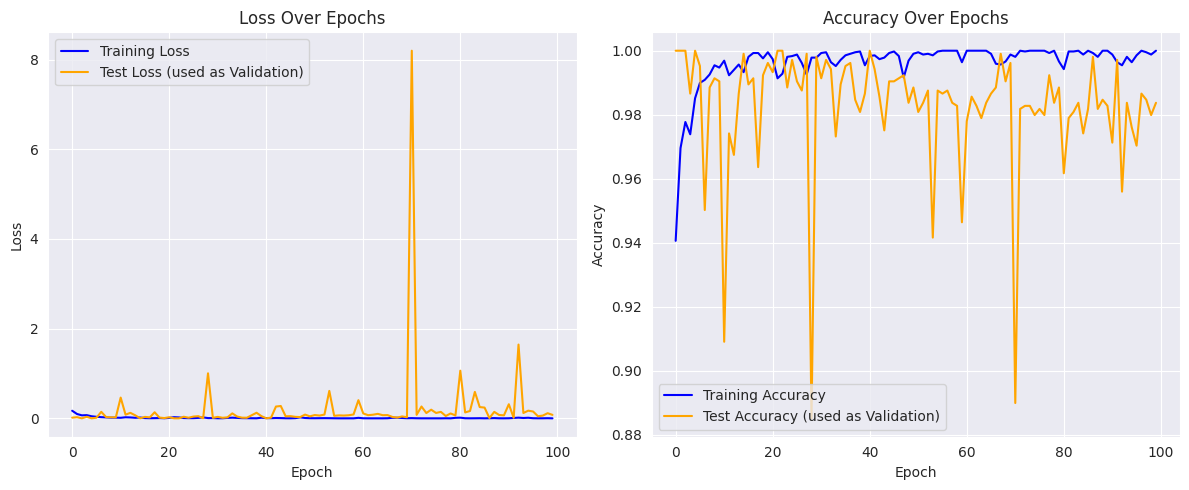

In [35]:
history = model.fit(train_images, train_labels_one_hot,
                    epochs=100,
                    validation_data=(test_images, test_labels_one_hot))

import matplotlib.pyplot as plt

# Plot loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Test Loss (used as Validation)', color='orange')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Test Accuracy (used as Validation)', color='orange')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [36]:
# Evaluate model on test data
loss, accuracy = model.evaluate(test_images, test_labels_one_hot)

# Print accuracy
print(f"Test Accuracy: {accuracy * 100:.2f}%")


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9861 - loss: 0.0626
Test Accuracy: 98.37%
